In [0]:
import pandas as pd
import random
import numpy as np
import pickle
import keras
from keras.layers import *
from keras import backend as k
from keras import optimizers
from keras.models import Model
from time import time
from keras.models import load_model
from google.colab import files
import matplotlib.pyplot as plt

In [0]:
uploaded = files.upload()

In [0]:
mfccs_test = np.load('test_mfccs.npy')
pitches_test = np.load('test_pitches (1).npy')
loudness_test = np.load('test_loudness.npy')
test_index = np.load('TestIndices.npy')

In [8]:
encoder = load_model('encoder.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
features = np.append(mfccs_test, pitches_test, axis = 2)
test_data = np.append(features, loudness_test, axis = 2)

In [0]:
test_pred = encoder.predict(test_data, batch_size = 32)

In [13]:
test_pred.shape

(2006, 20)

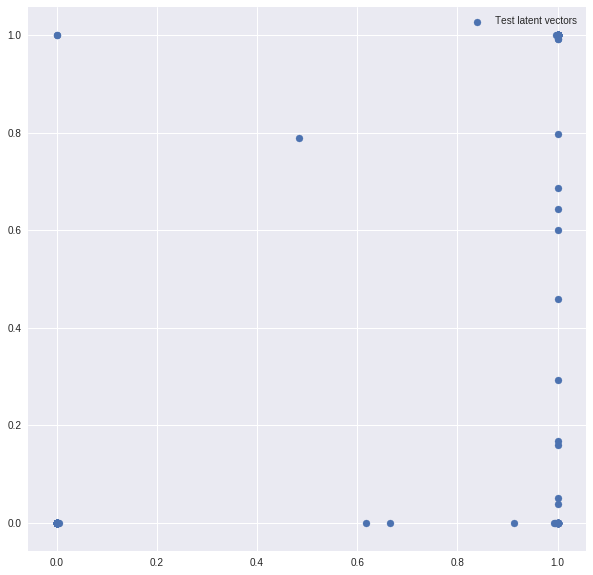

In [25]:
plt.figure(figsize = (10, 10))
plt.scatter(test_pred[:, 0], test_pred[:, 1], label = 'Test latent vectors')
plt.legend()
plt.show()

In [0]:
test_pred.dump('latent_features.npy')

In [0]:
files.download('latent_features.npy')